<a href="https://colab.research.google.com/github/raniaJilan/brazillian-Ecommerce/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Rania Jilan
- **Email:** ranihany223@gmail.com
- **ID Dicoding:** rania

## Menentukan Pertanyaan Bisnis

- Mengidentifikasi wilayah mana saja yang sering mengalami keterlambatan pengiriman, serta wilayah yang memiliki pengiriman tepat waktu.
- Mengetahui wilayah mana yang memiliki volume penjualan tertinggi dan produk apa yang paling laris di setiap wilayah.

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
customers_df = pd.read_csv('https://github.com/raniaJilan/brazillian-Ecommerce/blob/main/data/olist_customers_dataset.csv?raw=true')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
orders_df = pd.read_csv('https://github.com/raniaJilan/brazillian-Ecommerce/blob/main/data/olist_orders_dataset.csv?raw=true')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
orders_items_df = pd.read_csv('https://github.com/raniaJilan/brazillian-Ecommerce/blob/main/data/olist_order_items_dataset.csv?raw=true')
orders_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
products_df = pd.read_csv('https://github.com/raniaJilan/brazillian-Ecommerce/blob/main/data/olist_products_dataset.csv?raw=true')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
geolocation_df = pd.read_csv('https://github.com/raniaJilan/brazillian-Ecommerce/blob/main/data/olist_geolocation_dataset.csv?raw=true')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- xxx
- xxx

### Assessing Data

Menilai tabel customers

In [9]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [10]:
print('Jumlah duplikasi: ', customers_df.duplicated().sum())

Jumlah duplikasi:  0


Menilai tabel orders

In [11]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [12]:
print('Jumlah duplikasi: ', orders_df.duplicated().sum())

Jumlah duplikasi:  0


Menilai tabel orders items

In [13]:
orders_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [14]:
print('Jumlah duplikasi: ', orders_items_df.duplicated().sum())

Jumlah duplikasi:  0


Menilai tabel products

In [15]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [16]:
print('Jumlah duplikasi: ', products_df.duplicated().sum())

Jumlah duplikasi:  0


Menilai tabel geolocation

In [17]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [18]:
print('Jumlah duplikasi: ', geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


**Insight:**
- tabel orders memiliki missing values dan kesalahan data type
- tabel products memiliki missing values
- tabel geolocations memiliki duplikasi data

### Cleaning Data

Mengatasi missing value pada tabel products

In [19]:
products_df[products_df['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [21]:
#Imputasi dengan kategori "unknown" jika data tidak tersedia dan hapus kolom
products_df['product_category_name'].fillna('unknown', inplace=True)
products_df['product_name_lenght'].fillna(0, inplace=True)
products_df['product_description_lenght'].fillna(0, inplace=True)
products_df['product_photos_qty'].fillna(0, inplace=True)

<ipython-input-21-e509c04391be>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_name_lenght'].fillna(0, inplace=True)
<ipython-input-21-e509c04391be>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [22]:
#Imputasi dengan rata-rata atau median berdasarkan kategori produk
products_df['product_weight_g'] = products_df.groupby('product_category_name')['product_weight_g'].transform(
    lambda x: x.fillna(x.median())
)
products_df['product_length_cm'] = products_df.groupby('product_category_name')['product_length_cm'].transform(
    lambda x: x.fillna(x.median())
)
products_df['product_height_cm'] = products_df.groupby('product_category_name')['product_height_cm'].transform(
    lambda x: x.fillna(x.median())
)
products_df['product_width_cm'] = products_df.groupby('product_category_name')['product_width_cm'].transform(
    lambda x: x.fillna(x.median())
)


Mengatasi missing value tabel orders

In [23]:
orders_df[orders_df['order_approved_at'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [24]:
orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'], inplace=True)
orders_df = orders_df[orders_df['order_status'] != 'canceled']
orders_df = orders_df[orders_df['order_status'] != 'canceled']

<ipython-input-24-8aa825bfa2ed>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'], inplace=True)


In [25]:
print(orders_df.isna().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1233
order_delivered_customer_date    2346
order_estimated_delivery_date       0
dtype: int64


Mengatasi kesalahan tipe data tabel orders

In [44]:
datetime_coloumns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in datetime_coloumns:
    orders_df[col] = pd.to_datetime(orders_df[col])

Mengatasi duplikasi data pada geolocation

In [28]:
duplicate_rows = geolocation_df[geolocation_df.duplicated(keep=False)]
duplicate_rows

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [33]:
#menghapus baris yang sepenuhnya identik
geolocation_df.drop_duplicates(inplace=True)

In [31]:
print('Jumlah duplikasi: ', geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

Menggabungkan tabel customers dan orders

In [34]:
orders_customers_df = orders_df.merge(customers_df, on='customer_id', how='left')


Menggabungkan tabel orders dan orders items

In [37]:
orders_items_df = orders_customers_df.merge(orders_items_df, on='order_id', how='left')


menggabungkan tabel orders item dan products

In [38]:
orders_items_products_df = orders_items_df.merge(products_df, on='product_id', how='left')


Menggabungkan tabel customers dan geolocation

In [40]:
final_df = orders_items_products_df.merge(
    geolocation_df,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

**Analisis Wilayah dengan Keterlambatan atau Tepat Waktu**

In [48]:
#kolom baru untuk menghitung waktu pengiriman aktual dan membandingkannya dengan estimasi.
final_df['order_delivered_customer_date'] = pd.to_datetime(final_df['order_delivered_customer_date'])
final_df['order_approved_at'] = pd.to_datetime(final_df['order_approved_at'])
final_df['order_estimated_delivery_date'] = pd.to_datetime(final_df['order_estimated_delivery_date'])

final_df['actual_delivery_time'] = (
    final_df['order_delivered_customer_date'] - final_df['order_approved_at']
).dt.days

final_df['estimated_delivery_time'] = (
    final_df['order_estimated_delivery_date'] - final_df['order_approved_at']
).dt.days

final_df['delivery_status'] = final_df['actual_delivery_time'] <= final_df['estimated_delivery_time']

In [49]:
#identifikasi pengiriman tepat waktu dan terlambat tiap wilayah
delivery_analysis = final_df.groupby('customer_state')['delivery_status'].value_counts(normalize=True)
print(delivery_analysis)

customer_state  delivery_status
AC              True               0.943695
                False              0.056305
AL              True               0.772624
                False              0.227376
AM              True               0.962750
                False              0.037250
AP              True               0.935723
                False              0.064277
BA              True               0.849397
                False              0.150603
CE              True               0.814972
                False              0.185028
DF              True               0.902195
                False              0.097805
ES              True               0.882735
                False              0.117265
GO              True               0.912348
                False              0.087652
MA              True               0.773723
                False              0.226277
MG              True               0.933589
                False              0.066411


In [52]:
#Top 5 Wilayah dengan Keterlambatan Tertinggi:
delay_analysis = (
    final_df[~final_df['delivery_status']].groupby('customer_state')
    .size()
    .sort_values(ascending=False)
    .head(5)
)
print(delay_analysis)

customer_state
SP    331065
RJ    270169
MG    168232
SC     53945
RS     48590
dtype: int64


In [53]:
#Top 5 Wilayah dengan Pengiriman Tepat Waktu Tertinggi
ontime_analysis = (
    final_df[final_df['delivery_status']].groupby('customer_state')
    .size()
    .sort_values(ascending=False)
    .head(5)
)
print(ontime_analysis)

customer_state
SP    4083814
MG    2364961
RJ    1585907
RS     640267
PR     486893
dtype: int64


**Analisis Volume Penjualan dan Produk Terlaris**

In [50]:
#Agregasikan data penjualan berdasarkan wilayah
sales_by_region = final_df.groupby('customer_state')['price'].sum()
print(sales_by_region)

customer_state
AC    1.139514e+06
AL    5.389875e+06
AM    6.355681e+05
AP    8.724652e+05
BA    4.271019e+07
CE    8.414610e+06
DF    9.360617e+06
ES    2.750345e+07
GO    1.443728e+07
MA    6.682171e+06
MG    3.053208e+08
MS    7.810748e+06
MT    1.712565e+07
PA    1.149592e+07
PB    5.156566e+06
PE    1.246041e+07
PI    3.426774e+06
PR    6.075283e+07
RJ    2.339372e+08
RN    2.801410e+06
RO    2.478378e+06
RR    3.079292e+05
RS    8.129221e+07
SC    5.737168e+07
SE    2.802629e+06
SP    4.870088e+08
TO    2.698831e+06
Name: price, dtype: float64


In [51]:
#Hitung jumlah penjualan per produk di setiap wilayah.
top_products_by_region = final_df.groupby(['customer_state', 'product_category_name'])['order_item_id'].count()
top_products_by_region = top_products_by_region.sort_values(ascending=False)
print(top_products_by_region)

customer_state  product_category_name    
SP              cama_mesa_banho              494289
                beleza_saude                 374073
                moveis_decoracao             342888
                esporte_lazer                341562
                utilidades_domesticas        288070
                                              ...  
RS              musica                            2
RN              artigos_de_natal                  1
DF              moveis_colchao_e_estofado         1
                fashion_esporte                   1
MS              flores                            1
Name: order_item_id, Length: 1393, dtype: int64


In [54]:
#Top 5 Wilayah dengan Volume Penjualan Tertinggi:
sales_by_region = final_df.groupby('customer_state')['price'].sum().sort_values(ascending=False).head(5)
print(sales_by_region)

customer_state
SP    4.870088e+08
MG    3.053208e+08
RJ    2.339372e+08
RS    8.129221e+07
PR    6.075283e+07
Name: price, dtype: float64


In [55]:
#Top 5 Produk Terlaris secara Nasional:
top_products = (
    final_df.groupby('product_category_name')['order_item_id']
    .count()
    .sort_values(ascending=False)
    .head(5)
)
print(top_products)

product_category_name
cama_mesa_banho           1197614
beleza_saude               959074
moveis_decoracao           906011
esporte_lazer              902935
informatica_acessorios     821897
Name: order_item_id, dtype: int64


In [56]:
#Top 5 produk terlaris per wilayah
top_products_by_region = (
    final_df.groupby(['customer_state', 'product_category_name'])['order_item_id']
    .count()
    .sort_values(ascending=False)
    .groupby(level=0).head(5)
)
print(top_products_by_region)

customer_state  product_category_name 
SP              cama_mesa_banho           494289
                beleza_saude              374073
                moveis_decoracao          342888
                esporte_lazer             341562
                utilidades_domesticas     288070
                                           ...  
RR              moveis_decoracao             303
AP              telefonia                    299
RR              esporte_lazer                193
                informatica_acessorios       171
                telefonia                    141
Name: order_item_id, Length: 135, dtype: int64


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

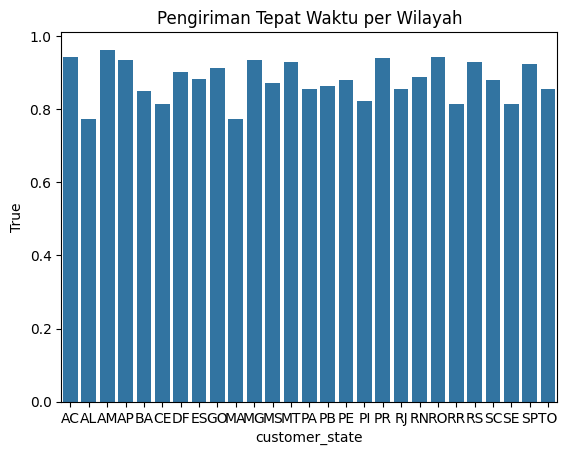

In [57]:
#presentase keterlambatan per wilayah
import seaborn as sns
import matplotlib.pyplot as plt

delivery_status_plot = delivery_analysis.unstack().reset_index()
sns.barplot(data=delivery_status_plot, x='customer_state', y=True)
plt.title('Pengiriman Tepat Waktu per Wilayah')
plt.show()

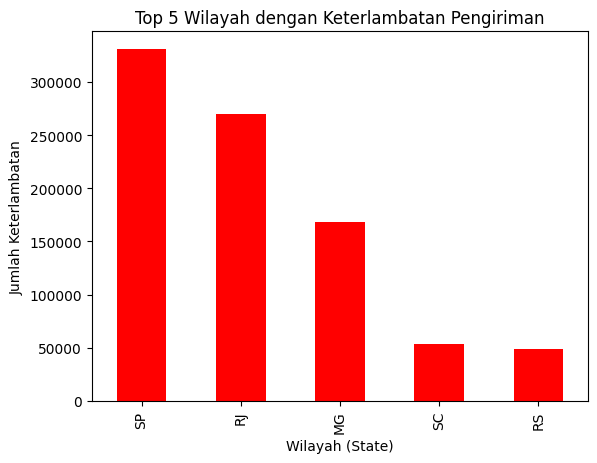

In [60]:
#keterlambatan per wilayah
delay_analysis.plot(kind='bar', color='red', title='Top 5 Wilayah dengan Keterlambatan Pengiriman')
plt.ylabel('Jumlah Keterlambatan')
plt.xlabel('Wilayah (State)')
plt.show()

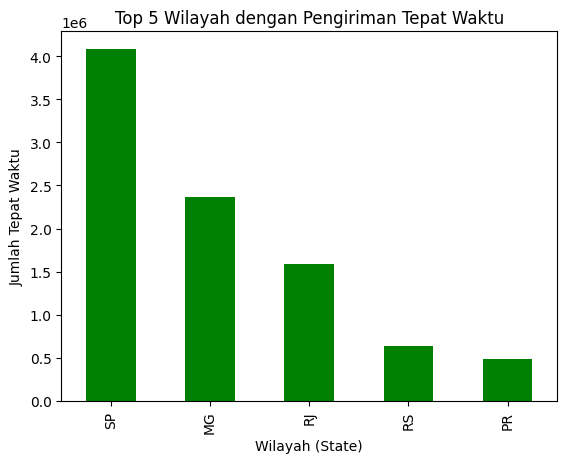

In [61]:
#tepat waktu per wilayah
ontime_analysis.plot(kind='bar', color='green', title='Top 5 Wilayah dengan Pengiriman Tepat Waktu')
plt.ylabel('Jumlah Tepat Waktu')
plt.xlabel('Wilayah (State)')
plt.show()


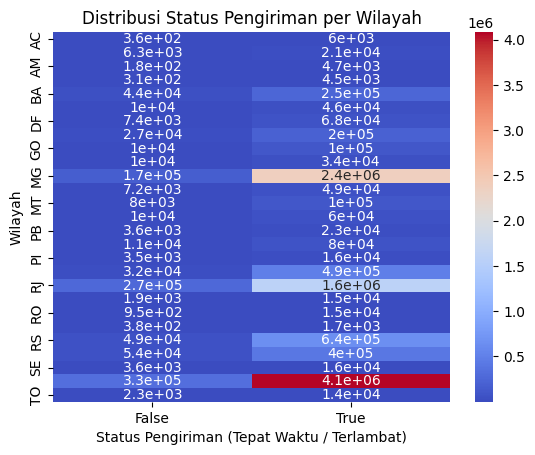

In [62]:
#distribusi status pengiriman
status_heatmap = final_df.groupby(['customer_state', 'delivery_status']).size().unstack()
sns.heatmap(status_heatmap, cmap='coolwarm', annot=True)
plt.title('Distribusi Status Pengiriman per Wilayah')
plt.ylabel('Wilayah')
plt.xlabel('Status Pengiriman (Tepat Waktu / Terlambat)')
plt.show()

### Pertanyaan 2:

<Axes: title={'center': 'Volume Penjualan per Wilayah'}, xlabel='customer_state'>

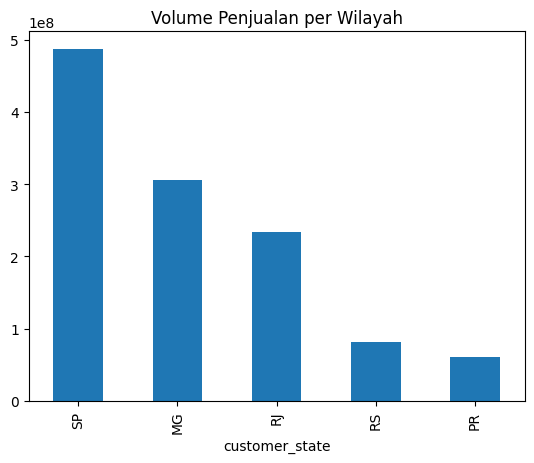

In [58]:
#volume penjualan per wilayah
sales_by_region.plot(kind='bar', title='Volume Penjualan per Wilayah')

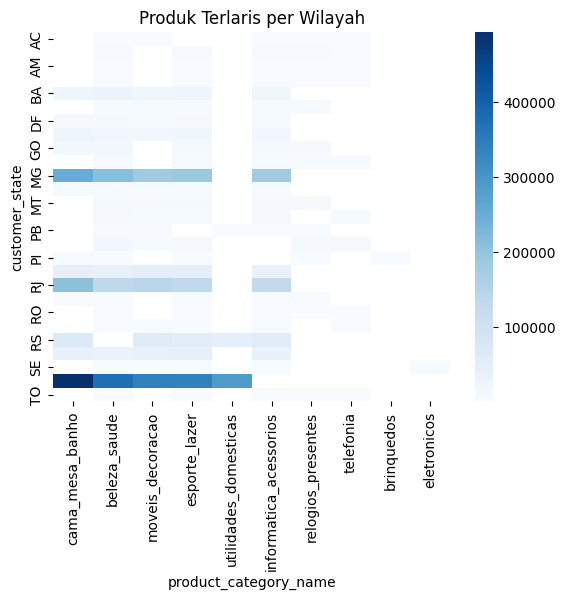

In [59]:
#distribusi kategori produk populer di setiap wilayah
top_products_pivot = top_products_by_region.unstack()
sns.heatmap(top_products_pivot, cmap='Blues')
plt.title('Produk Terlaris per Wilayah')
plt.show()

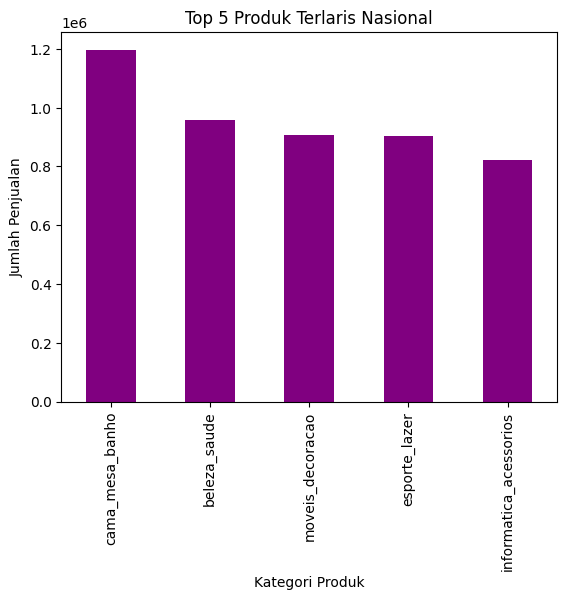

In [63]:
#produk terlaris secara nasional
top_products.plot(kind='bar', title='Top 5 Produk Terlaris Nasional', color='purple')
plt.ylabel('Jumlah Penjualan')
plt.xlabel('Kategori Produk')
plt.show()

<ipython-input-65-6d9ddec13e4f>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


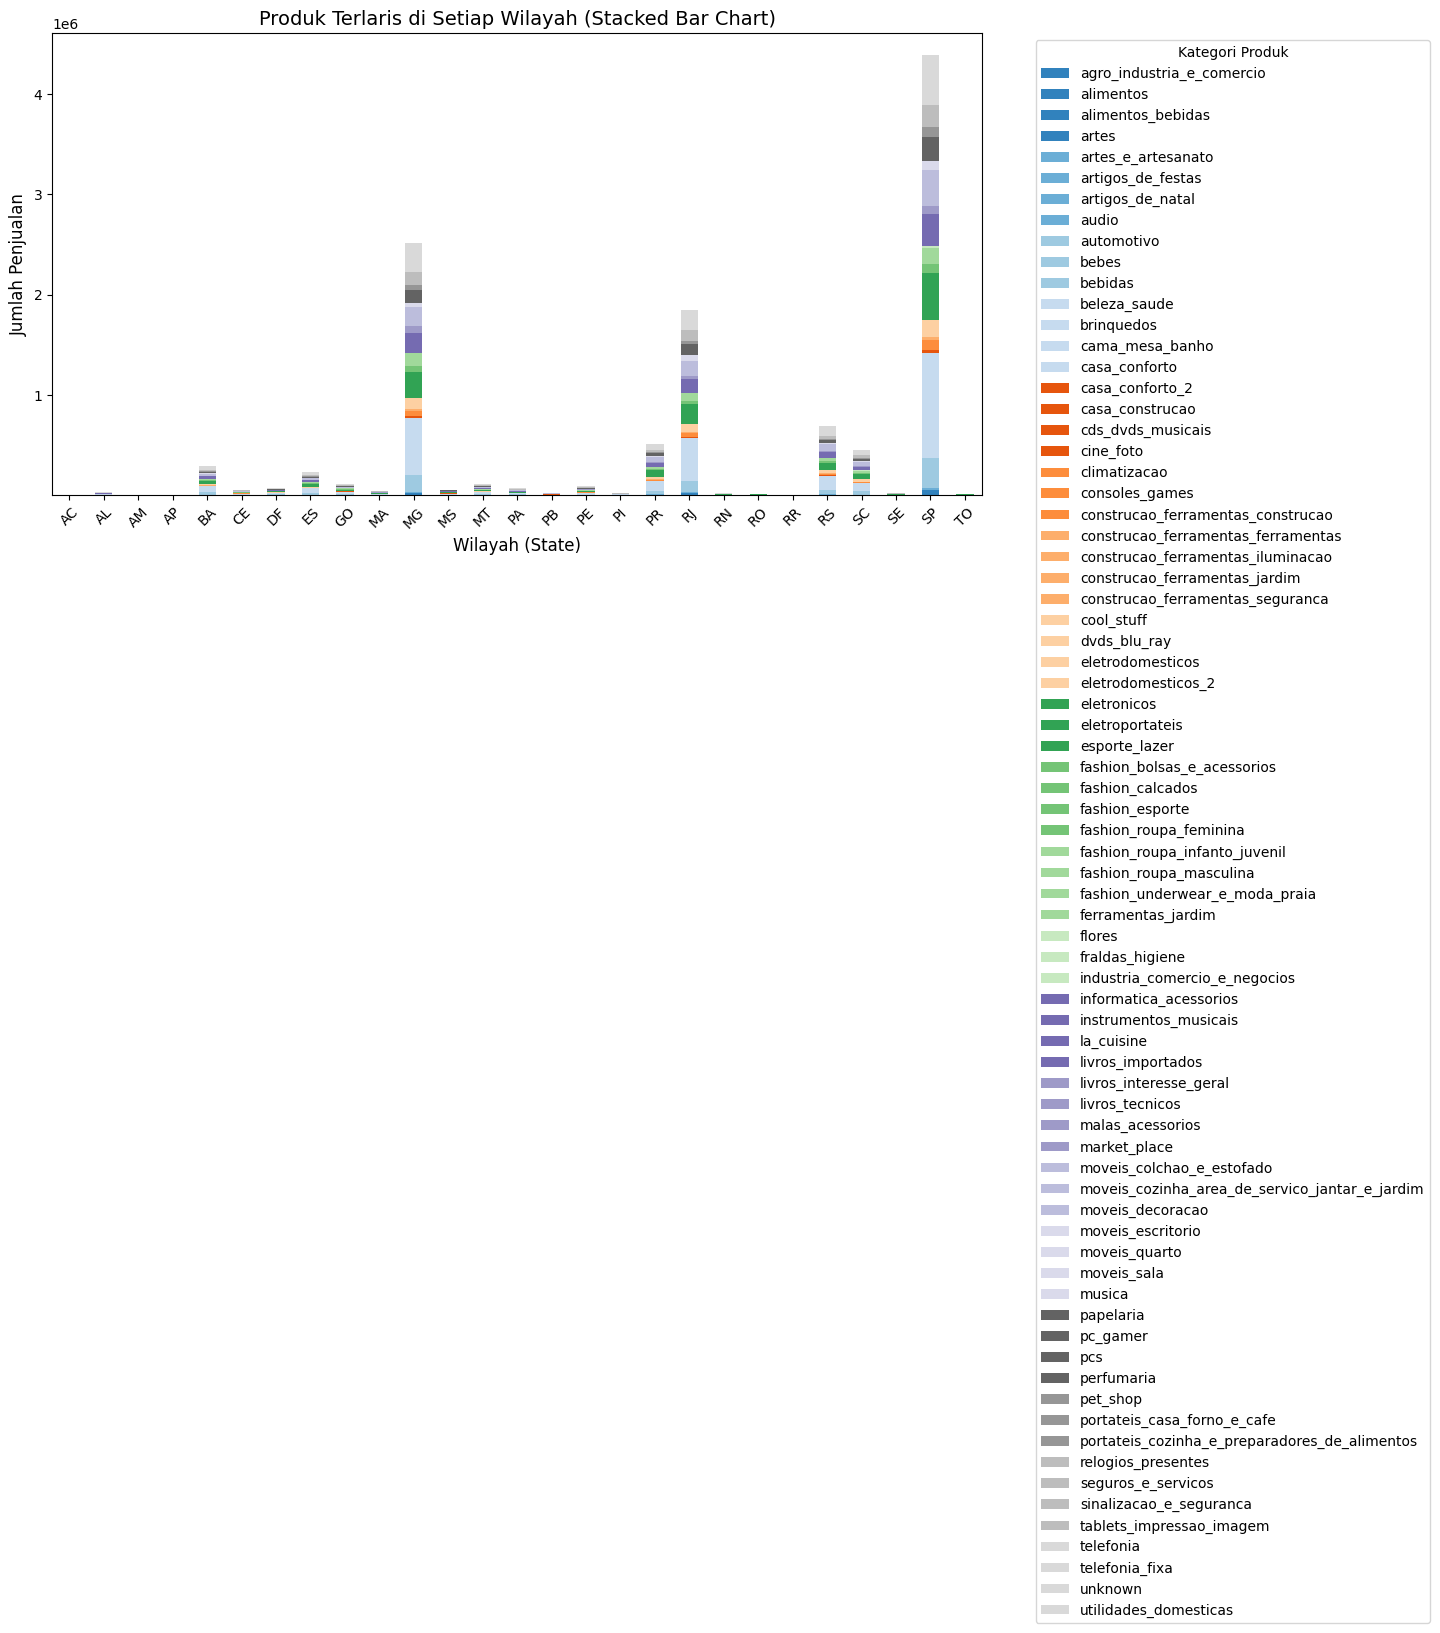

In [65]:
#produk terlaris tiap wilayah
import matplotlib.pyplot as plt

# Hitung jumlah penjualan untuk setiap produk di setiap wilayah
product_region_sales = (
    final_df.groupby(['customer_state', 'product_category_name'])['order_item_id']
    .count()
    .unstack(fill_value=0)
)

# Plot stacked bar chart
product_region_sales.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title('Produk Terlaris di Setiap Wilayah (Stacked Bar Chart)', fontsize=14)
plt.xlabel('Wilayah (State)', fontsize=12)
plt.ylabel('Jumlah Penjualan', fontsize=12)
plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [67]:

#Save the final DataFrame to a CSV file
final_df.to_csv('final_ecommerce_data.csv', index=False)

print("Final data saved to final_ecommerce_data.csv")

Final data saved to final_ecommerce_data.csv


## Analisis Lanjutan (Opsional)

## Conclusion

**Mengidentifikasi wilayah mana saja yang sering mengalami keterlambatan pengiriman, serta wilayah yang memiliki pengiriman tepat waktu.**

wilayah yang sering mengalami keterlambatan pengiriman adalah SP, dan wilayah yang sering mengalami ketepatan waktu adalah wilayah SP

**Mengetahui wilayah mana yang memiliki volume penjualan tertinggi dan produk apa yang paling laris di setiap wilayah.**

wilayah yang memiliki volume penjualan tertinggi adalah wilayah SP dan produk yang paling laris pada tiap wilayah dapat dilihat pada tabel diatas